In [1]:
import numpy as np

# Basic

\begin{align}
\begin{split}
\min \quad& f_{m}(x) \quad \quad \quad \quad m = 1,..,M  \\[4pt]
\text{s.t.}   \quad& g_{j}(x) \leq 0  \quad \; \; \,  \quad j = 1,..,J \\[2pt]
\quad& h_{k}(x) = 0        \quad  \; \; \quad k = 1,..,K \\[4pt]
\quad& x_{i}^{L} \leq x_{i} \leq x_{i}^{U}  \quad i = 1,..,N \\[2pt]
\quad& x \in \Omega
\end{split}
\end{align}

In [2]:
# ?ElementwiseProblem

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [4]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
#                          n_ieq_constr=2,
                            
                         xl=np.array([-2, -2]),
                         xu=np.array([2, 2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0] ** 2 + x[1] ** 2)
        f2 = (x[0] - 1) ** 2 + x[0] ** 2

#         g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
#         g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8

        out["F"] = [f1, f2]
#         out["G"] = [g1, g2]

In [5]:
problem = MyProblem()

In [6]:
algorithm = NSGA2(pop_size=100)

In [7]:
res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=True,
               seed=1)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      3 |             - |             -
     2 |      200 |      6 |  0.0834823359 |         ideal
     3 |      300 |     10 |  0.1629889530 |         nadir
     4 |      400 |     14 |  0.5271827812 |         nadir
     5 |      500 |     16 |  0.0066559713 |         ideal
     6 |      600 |     20 |  0.0047908096 |         ideal
     7 |      700 |     32 |  0.9300543084 |         nadir
     8 |      800 |     50 |  0.0073261546 |             f
     9 |      900 |     64 |  0.0035557953 |             f
    10 |     1000 |     82 |  0.0031070933 |             f
    11 |     1100 |     98 |  0.0017319013 |             f
    12 |     1200 |    100 |  1.527191E+01 |         nadir
    13 |     1300 |    100 |  0.0017562133 |             f
    14 |     1400 |    100 |  0.0029766282 |             f
    15 |     1500 |    100 |  0.0018443955 |             f
    16 |     1600 |    100 |  0.0029219365 |            

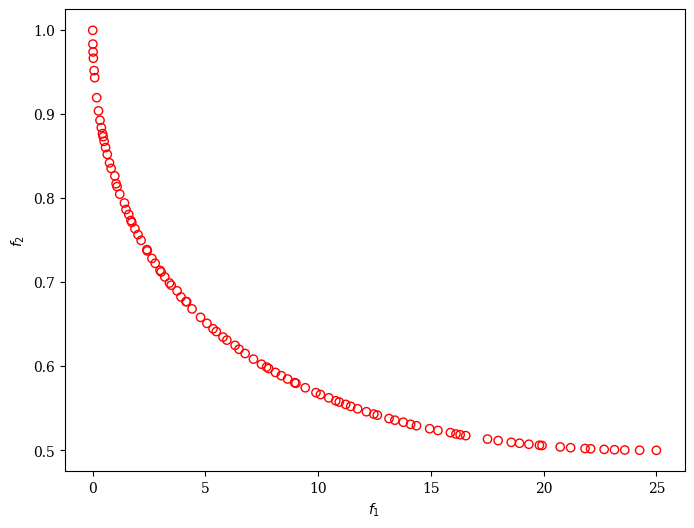

In [8]:
plot = Scatter()
plot.add(res.F, edgecolor="red", facecolor="none")
plot.show()

In [9]:
res.F[:5]

array([[2.49997105e+01, 5.00000000e-01],
       [6.60017081e-05, 9.99975365e-01],
       [1.75586203e-01, 9.19777827e-01],
       [8.77017298e-02, 9.43594809e-01],
       [4.40449082e+00, 6.68352303e-01]])

In [10]:
res.X[:5]

array([[ 4.99996621e-01, -6.95431469e-04],
       [ 1.23178710e-05, -8.12320965e-04],
       [ 4.18636517e-02, -1.81568201e-03],
       [ 2.90462821e-02, -5.77328265e-03],
       [ 2.09868734e-01, -1.50383751e-04]])

In [11]:
x = [4.99996621e-01, -6.95431469e-04]

In [12]:
f1 = 100 * (x[0] ** 2 + x[1] ** 2)
f2 = (x[0] - 1) ** 2 + x[0] ** 2

In [13]:
f1

24.99971046363457

In [14]:
f2

0.5000000000228353

# TSP

In [15]:
from pymoo.core.repair import Repair

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.problems.single.traveling_salesman import create_random_tsp_problem
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination

In [88]:
class StartFromZeroRepair(Repair):

    def _do(self, problem, X, **kwargs):
        I = np.where(X == 0)[1]

        for k in range(len(X)):
            i = I[k]
            X[k] = np.concatenate([X[k, i:], X[k, :i]])

        return X

In [89]:
problem = create_random_tsp_problem(50, 1000, seed=1)

In [90]:
# problem.cities

In [91]:
algorithm = GA(
    pop_size=300,
    sampling=PermutationRandomSampling(),
    mutation=InversionMutation(),
    crossover=OrderCrossover(),
    repair=StartFromZeroRepair(),
    eliminate_duplicates=True
)

In [92]:
# if the algorithm did not improve the last 200 generations then it will terminate (and disable the max generations)
termination = DefaultSingleObjectiveTermination(period=2000, n_max_gen=100000000)

In [93]:
res = minimize(
    problem,
    algorithm,
    termination,
    seed=1,
)

In [94]:
res.X

array([ 0, 39, 44, 33, 31, 17, 41, 35, 23, 38, 16, 34, 48, 40, 20, 12, 10,
       18, 29,  5, 11,  8,  4, 46, 47, 28, 27, 37, 24,  2, 13,  9, 26,  3,
        1, 15, 30, 22, 32, 49,  7, 25, 19, 36, 45, 14,  6, 21, 42, 43])

/home/mdob/python_3_10_default_env/lib/python3.10/site-packages/pymoo/problems/single/traveling_salesman.py:79: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


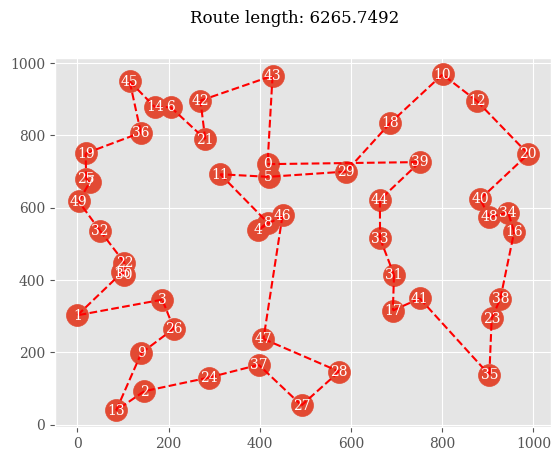

In [95]:
from pymoo.problems.single.traveling_salesman import visualize
visualize(problem, res.X)